In [1]:
import numpy as np
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

### 1.a)

Registros con y1
520
Registros con y2
480


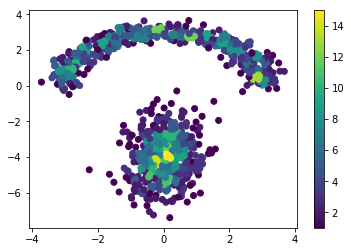

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)


print("Registros con y1")
print( len(y1) )
print("Registros con y2")
print( len(y2) )


equis=X[:,0]
ii=X[:,1]

hist, xedges, yedges = np.histogram2d(equis, ii,30)
xidx = np.clip(np.digitize(equis, xedges) - 1, 0, hist.shape[0] - 1)
yidx = np.clip(np.digitize(ii, yedges) - 1, 0, hist.shape[1] - 1)
c = hist[xidx, yidx]
plt.scatter(equis, ii, c=c)

plt.colorbar()
plt.show()


In [3]:
import matplotlib.pyplot as plt
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

### 1.b)

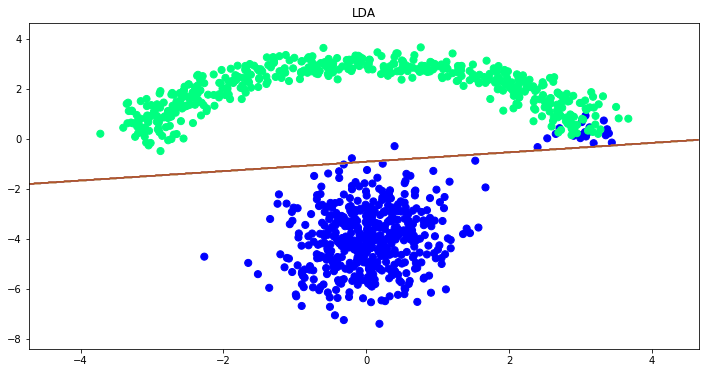

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_LDA = LDA()
model_LDA.fit(X,y)
visualize_border(model_LDA,X,y,"LDA")

### 1.c)

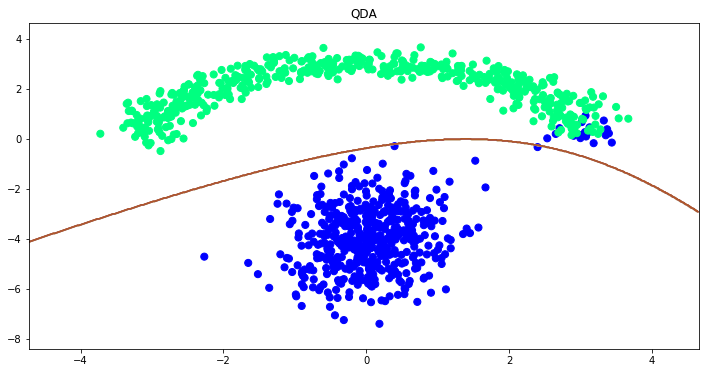

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model_QDA = QDA()
model_QDA.fit(X,y)
visualize_border(model_QDA,X,y,"QDA")

### 1.d)

In [6]:
from sklearn.metrics import accuracy_score
y_true = y
y_pred_LDA = model_LDA.predict(X)
y_pred_QDA = model_QDA.predict(X)
print("Miss Classification Loss: %f"%(1-accuracy_score(y_true, y_pred_LDA)))
print("Miss Classification Loss: %f"%(1-accuracy_score(y_true, y_pred_QDA)))

Miss Classification Loss: 0.022000
Miss Classification Loss: 0.019000


In [7]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

### 1.e)

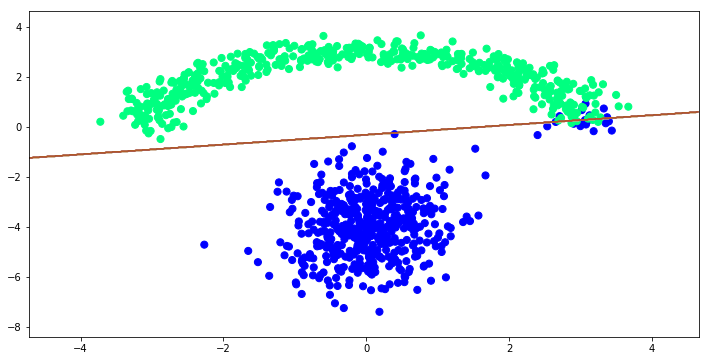

In [8]:
from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

Parametro c en model.set_param

C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

### 1.f)

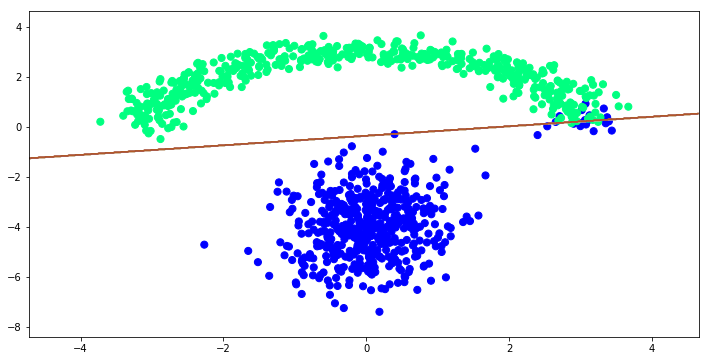

In [9]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

### 1.g)

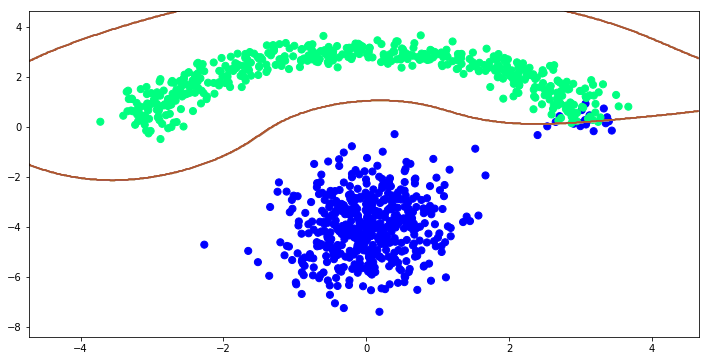

In [10]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf') #try poly
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

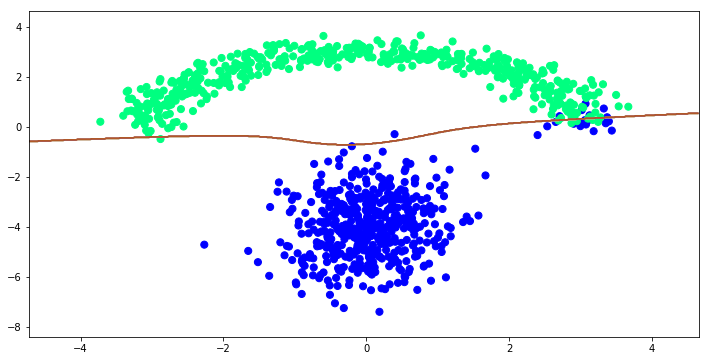

In [11]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='poly') #try poly
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

### 1.h)

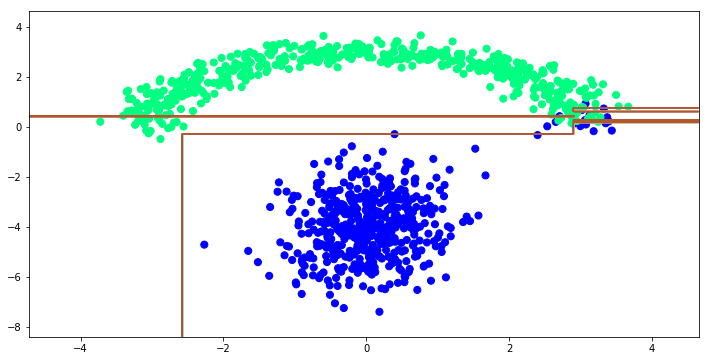

In [12]:
from sklearn.tree import DecisionTreeClassifier as Tree
def train_model(param):
    model = Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    return model
p_min = 1 #define your range
p_max = 10 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

### 1.i)

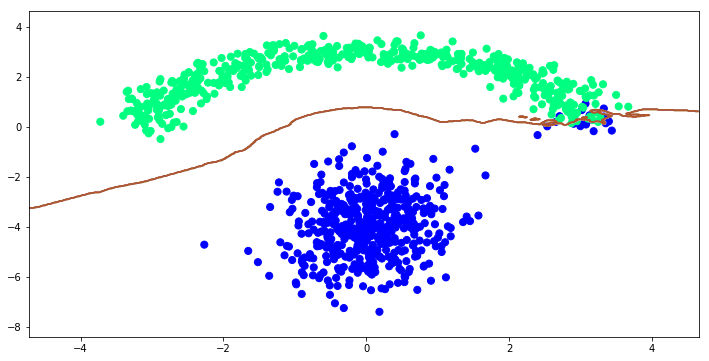

In [13]:
from sklearn.neighbors import KNeighborsClassifier
def train_model(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    return model
p_min = 1 #define your range
p_max = 10 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

## 2

In [14]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

### 2.a)

In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv('./heartbeat-sounds/set_a.csv')

print(df.head())
df.shape

  dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN


(176, 4)

### 2.b)

In [16]:
import os
os.getcwd()

'/home/nicomero/Escritorio/Maquinas de aprendizaje/tarea2maquinas'

In [17]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux
new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})#Aunlabelled no existe pero Aunlabelledtest si
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='heartbeat-sounds/set_a/') #MODIFICAR EL PATH A LA CARPETA CON LOS AUDIOS
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))

### 2.c)

In [18]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
            1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0,
            2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,
            0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]

### 2.d)

In [19]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)

### 2.e)

In [21]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values

X.shape


(176, 396900)

### 2.f)

In [21]:
X_fourier = np.abs(np.fft.fft(X))

MemoryError: 

## 3

### 3.a)

           tweet_id
count  4.000000e+04
mean   1.845184e+09
std    1.188579e+08
min    1.693956e+09
25%    1.751431e+09
50%    1.855443e+09
75%    1.962781e+09
max    1.966441e+09
(40000, 4)
     tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We want to trade with someone w...  


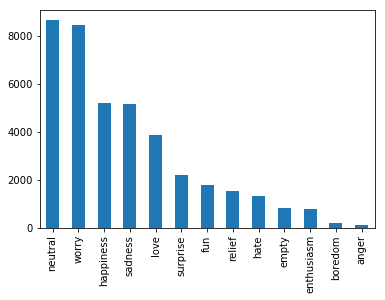

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('text_emotion.csv')
print(df.describe())
print(df.shape)
print(df.head())

df['sentiment'].value_counts().plot(kind='bar')
plt.show()

df['author'].value_counts().head()
df['sentiment'].value_counts()

### 3.b)

In [6]:
import numpy as np


msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

print(df_train.shape)


print(df_test.shape)


(31952, 4)
(8048, 4)


### 3.c)

In [7]:
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

pd.options.mode.chained_assignment = None


nltk.download('stopwords')

def normalizar( df ):
    nltk.download('wordnet')
    #definir lemmatizer
    lemmatizer = WordNetLemmatizer()

    ##hay varios algoritmos de stemmer. 
    # http://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization
    #from nltk.stem.porter import PorterStemmer
    #stemmer = PorterStemmer()

    #descargar y definir stop words
    
    stop = stopwords.words('english')

    #minusculas
    df['content'] = df['content'].str.lower()     

    #remover puntuacion
    df['content'] = df['content'].str.replace('[^\w\s]',' ')   

    #remove stopwords
    df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))  

    #stemming or lematize
    df['content'] = df['content'].apply(lambda x : filter(None,x.split(" ")))
    df['content'] = df['content'].apply(lambda x : [lemmatizer.lemmatize(y) for y in x]) #lematize
    #df['content'] = df['content'].apply(lambda x : [stemmer.stem(y) for y in x]) #stem
    df['content'] = df['content'].apply(lambda x : " ".join(x))
    return

normalizar(df_train)
normalizar(df_test)
df_train.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nicomero/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/nicomero/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /home/nicomero/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,tiffanylue know listenin bad habit earlier sta...
1,1956967666,sadness,wannamama,layin n bed headache ughhhh waitin call
2,1956967696,sadness,coolfunky,funeral ceremony gloomy friday
3,1956967789,enthusiasm,czareaquino,want hang friend soon
5,1956968477,worry,xxxPEACHESxxx,pinging ghostridah14 go prom bc bf like friend


### 3.d)

In [8]:
traduccion = {"neutral":1, "worry":-1, "happiness":1, "sadness":-1
             ,"love":1, "surprise":1, "fun":1, "relief":1
             ,"hate":-1, "empty":-1, "enthusiasm":1, "boredom":-1
             ,"anger":-1}


df_train['binarySent']=df_train['sentiment'].replace(traduccion)
df_test['binarySent']=df_test['sentiment'].replace(traduccion)
print(df_train.head())
print(df_test.head())

     tweet_id   sentiment         author  \
0  1956967341       empty     xoshayzers   
1  1956967666     sadness      wannamama   
2  1956967696     sadness      coolfunky   
3  1956967789  enthusiasm    czareaquino   
5  1956968477       worry  xxxPEACHESxxx   

                                             content  binarySent  
0  tiffanylue know listenin bad habit earlier sta...          -1  
1            layin n bed headache ughhhh waitin call          -1  
2                     funeral ceremony gloomy friday          -1  
3                              want hang friend soon           1  
5     pinging ghostridah14 go prom bc bf like friend          -1  
      tweet_id sentiment         author  \
4   1956968416   neutral      xkilljoyx   
6   1956968487   sadness       ShansBee   
14  1956970860  surprise   okiepeanut93   
18  1956971473     worry          LCJ82   
20  1956971981     worry  andreagauster   

                                              content  binarySent  
4   da

### 3.e)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_train['content'])
vectorizer.transform(df_test['content'])
#(tweet,palabra)
print(X)

  (0, 34748)	0.461576105258
  (0, 19450)	0.189314777531
  (0, 20635)	0.387891279291
  (0, 4059)	0.21927488108
  (0, 14881)	0.39656492752
  (0, 11088)	0.321589758185
  (0, 32599)	0.301593646232
  (0, 13273)	0.340405638647
  (0, 26136)	0.291629654635
  (1, 20075)	0.530536308751
  (1, 4519)	0.276712041043
  (1, 15281)	0.333953786483
  (1, 36013)	0.473802102531
  (1, 36997)	0.458945711253
  (1, 6339)	0.308734419352
  (2, 13515)	0.539631601154
  (2, 6884)	0.572359832357
  (2, 14189)	0.505651352919
  (2, 13373)	0.354286136662
  (3, 37065)	0.400278893466
  (3, 15048)	0.632617548268
  (3, 13379)	0.449681516963
  (3, 32036)	0.487194394848
  (4, 13379)	0.23865857378
  (4, 26806)	0.465803945346
  :	:
  (31949, 9406)	0.417128073642
  (31949, 15100)	0.517478349035
  (31949, 23519)	0.554608989294
  (31950, 9406)	0.374728066098
  (31950, 20903)	0.297996240052
  (31950, 15100)	0.232438995641
  (31950, 21637)	0.307294251949
  (31950, 37824)	0.389485761912
  (31950, 31984)	0.319952430891
  (31950, 23301

### 3.f)

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(df_train['content'], df_train['binarySent'])

#### Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

multibayes = MultinomialNB()
bayes.fit(df_train['content'], df_train['binarySent'])

#### LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(df_train['content'], df_train['binarySent'])

#### QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(df_train['content'], df_train['binarySent'])

#### Regresion logistica

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_LDA = LDA()
model_LDA.fit(df_train['content'], df_train['binarySent'])

#### SVM

In [ ]:
from sklearn.svm import SVC as SVM

model= SVM()
model.fit(df_train['content'], df_train['binarySent'])

#### Arboles de decision

In [ ]:
from sklearn.tree import DecisionTreeClassifier as Tree

model = Tree() 
model.fit(df_train['content'], df_train['binarySent'])